In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def success_prob(M:float, p:float, n_successes:int) -> float:
    """
    Calculate the probability of having at least <n_successes> successful trials in a series of <M> independent Bernoulli trials 
    with a success rate of <p>.
    """
    return 1 - np.sum([math.comb(M, i) * p**i * (1-p)**(M-i) for i in range(0, n_successes)])
  
assert round(success_prob(19, 0.6, 10), 3) == 0.814

 Make a graph of the probability of a correct decision for
various sizes of the jury and different competence levels (p) of the
individual doctors.

Text(0.5, 1.0, 'Influence of jury size and individual success rate on majority decisions')

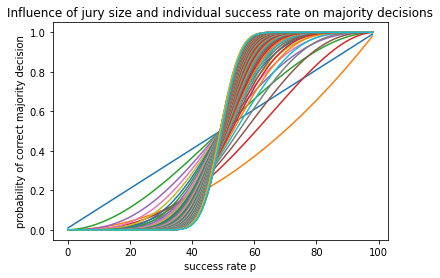

In [13]:
# The maximum size of the jury, i.e. the maximum amount of trials/voters
max_jury_size = 100
# The minimum size of the jury, i.e. the minimum amount of trials/voters
min_jury_size = 1
# The amount by which we increase the size of the jury for each set of experiments
jury_increment = 1
# The maximum success rate of a voter considered in the experiments
max_p = 0.99
# The minimum success rate of a voter considered in the experiments
min_p = 0.01
# The amount by which the success rate is increased for each set of experiments
p_increment = 0.01

# Collect the probabilities of making a correct decision through majority vote for each set of experiments
probabilities = []
# Run a set of experiments for each considered jury size
for jury_size in range(min_jury_size, max_jury_size+jury_increment, jury_increment):
    # Collect the probability for each success rate for the current jury size
    current_probs = []
    # initialize the success rate as the minimum
    p = min_p
    while p<=max_p:
        # Get the probability of a correct majority decision for the given combination of success rate and jury size
        current_probs.append(success_prob(jury_size, p, math.floor(jury_size/2)+1))
        # increment the success rate
        p = round(p + p_increment, 2)
    probabilities.append(current_probs)

# Visualize the collected probabilities
for j in range(len(probabilities)):
    plt.plot([i for i in range(len(probabilities[j]))], probabilities[j])
    
plt.xlabel('success rate p')
plt.ylabel('probability of correct majority decision')
plt.title('Influence of jury size and individual success rate on majority decisions')

Text(0.5, 1.0, 'Influence of jury size and individual success rate on majority decisions')

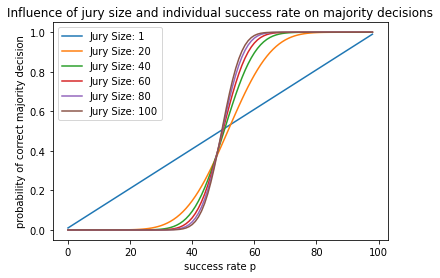

In [23]:
#fig, axs = plt.subplots(1, 2, facecolor="w")
plt.plot([i for i in range(len(probabilities[0]))], probabilities[0], label=f'Jury Size: 1')
for jury_size in range(19, len(probabilities), 20):
    plt.plot([i for i in range(len(probabilities[jury_size]))], probabilities[jury_size], label=f'Jury Size: {jury_size+1}')
plt.xlabel('success rate p')
plt.ylabel('probability of correct majority decision')
plt.legend(loc='best')
plt.title('Influence of jury size and individual success rate on majority decisions')

(d) (5 points) Who has the highest chance to make the correct decision:
the radiologist, the group of doctors or the group of students? How
big does the group of medical students need to be to make the probability of a correct decision (almost) equal to the prediction of the
group of doctors?


Jury Size: 19, Probability: 0.8139079785845882
Jury Size: 20, Probability: 0.7553372033163932
Jury Size: 21, Probability: 0.8256221336382272
Jury Size: 22, Probability: 0.7719500050288267
Jury Size: 23, Probability: 0.8363565593601073
Jury Size: 24, Probability: 0.7869782010394588
Jury Size: 25, Probability: 0.8462322310242371
Jury Size: 26, Probability: 0.800652207959023
Jury Size: 27, Probability: 0.8553482356372799
Jury Size: 28, Probability: 0.8131541571426246
Jury Size: 29, Probability: 0.8637870513362109
Jury Size: 30, Probability: 0.8246309464931708
Jury Size: 31, Probability: 0.8716182723048189
Jury Size: 32, Probability: 0.8352030948007916
Jury Size: 33, Probability: 0.8789013078056244
Jury Size: 34, Probability: 0.8449709306489307
Jury Size: 35, Probability: 0.885687383236963
Jury Size: 36, Probability: 0.854019031224049
Jury Size: 37, Probability: 0.8920210536395459
Jury Size: 38, Probability: 0.8624194782843168
Jury Size: 39, Probability: 0.8979413687105917


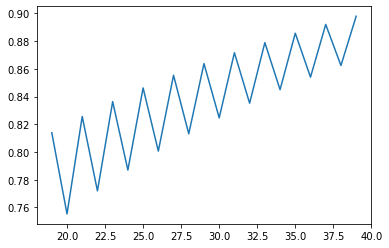

In [25]:
probs = [success_prob(i, 0.6, math.floor(i/2)+1) for i in range(19,40)]
plt.plot([i for i in range(19,40)], probs)
for idx, jury_size in enumerate(range(19,40)):
    print(f'Jury Size: {jury_size}, Probability: {probs[idx]}')